# Feuille de TP 5 $\quad$ Résoudre de façon approchée une EDO


**Commencez par créer un dossier TP5 destiné à accueillir tous les scripts de ce TP.
Pensez à tester tous vos programmes un par un.**


## Exercice 5.1 :

Créer un module **mes_fonctions** et y coder la fonction $idt(t, x)$ qui correspond à la fonction
mathématique $(t, x) \rightarrow t.$


Par la suite on importera ce module sous l’alias $f$ (import mes_fonctions as $f$).

In [1]:
%%writefile mes_fonctions.py
import numpy as np

def idt(t, x):
    """(𝑡,𝑥)→𝑡."""
    return t
def idx(t, x):
    return x
def myExp(t):
    return np.exp(t)
def myF(t,x):
    return x + np.cos(t)

Overwriting mes_fonctions.py


Ecrire une fonction python idx qui prend en argument deux réels  𝑡,𝑥  et renvoie  𝑥 .
Ecrire une fonction python myExp qui prend en argument un réel  𝑡  et renvoie  𝑒𝑡 .
Ecrire une fonction python myF qui prend en argument deux réels  𝑡,𝑥  et renvoie  𝑥+𝑐𝑜𝑠(𝑡) .
Tester ces fonctions.

In [3]:
import mes_fonctions as f
f.idt(1,2)

1

## 1 Mon premier schéma : méthode d’Euler explicite

Pour $\; \; f : (t, x) \in \mathbb{R^{2}} \rightarrow \mathbb{R}$ de classe $C^{1} \;$ on considère le problème de Cauchy suivant:
$
 \left\{
    \begin{array}{ll}
        y^{\prime}=f(t,y)  \\
        y(t_{0})=y_{0}
    \end{array}
\right.
$
$\quad \quad (1)$

On admet que le cadre mathématique est « bon » : en particulier, la solution existe et elle est
unique ; cela est vrai pour tout couple $(t_{0}, y_{0})$. 

On notera $\; y : t \rightarrow y(t)\; $ cette solution.

Nous cherchons à approcher la solution à l’aide de l’ordinateur sur un intervalle de temps $[0 ,T]$.
**On parle de résolution numérique.**

Au lieu de calculer cette solution en tout temps, nous allons chercher une approximation de cette
solution à des temps particuliers qui découpent $[0,T]$ en petits intervalles où la solution varie peu.
Cela s’appelle la discrétisation. La façon la plus simple de procéder est de choisir $N$ grand puis
d’approcher la solution aux instants $\;t_{n} = t_{0} + nh\;$ où $\;h = \frac{T}{N} \;$et $\;n = 1$ à$\; N$. Les mathématiques
appliquées fournissent alors des relations de récurrence, appelées schémas, permettant de calculer
$\;u_{n+1}\;$ à partir de $\;u_{n}$. Comme on part de $\;u_{0} = y_{0}\;$ il reste à calculer ces termes un par un jusqu’à
$\;n = N$.

Le schéma d’Euler explicite est le schéma le plus simple pour discrétiser une **EDO**. 

Nous admettrons qu’il « approche » bien la solution exacte. Il est définit par:
$
 \left\{
    \begin{array}{ll}
        x_{0}=y_{0}  \\
        x_{n+1}=x_{n}+h\,f(t_{n},x_{n})
    \end{array}
\right.
$
$\quad \quad (2)$

## Exercice 5.2 : Un premier test

Commençons par tester ce schéma pour $f : (t, x) \rightarrow t $  (la fonction $idt$ du script mes_fonctions.py).

**1.** Rappeler la solution analytique de l’équation pour $(t_{0}, y_{0}) = (0, y_{0})$.



t0 = 0 et y0 = y0 # PAS SUR

Créer un script python **solve_EDO.py** dans le même dossier.

**2.** Dans le fichier **solve_EDO.py**, écrire une fonction python **StepEuler** qui prend en argument trois réels $t, x, h$ et une fonction python $f$ à deux variables réelles et qui renvoie l’approximation de la solution à l’aide du schéma à l’instant $t+h : StepEuler(t, x, h, f) = x+hf(t, x).$

In [5]:
%%writefile solve_EDO.py
import numpy as np

def StepEuler(t, x, h, f):
    """𝑡+ℎ:𝑆𝑡𝑒𝑝𝐸𝑢𝑙𝑒𝑟(𝑡,𝑥,ℎ,𝑓)=𝑥+ℎ𝑓(𝑡,𝑥)."""
    #oui bien
    return x + h*f(t,x)

def MyEuler(t0,x0, T, N, f):
    """Fonction """
    h = T/N
    #print(h)
    time = np.empty(N+1)
    x = np.empty(N+1)
    x[0] = x0
    time[0] = t0
    for n in np.arange(N):
        time[n+1] = t0 + (n+1)*h
        x[n+1] = StepEuler(time[n],x[n],h,f)
    return time , x

Overwriting solve_EDO.py


**3.** Dans le même fichier, ajouter une fonction **MyEuler** qui prend en argument trois réels
$t_{0}, x_{0}, T$ un entier $N$ et une fonction python $f$ à deux variables réelles et qui:


a) Calcule $h = \frac{T}{N}$,

b) Crée deux tableaux $\;$ time, **$x$** de taille $(N + 1)$ (et de dimension 1),

c) Calcule chacun des instants $t_{n}$ et des approximations de la solution $x_{n}$ à l’aide du schéma d’Euler explicite et les stocke dans time$[n]$ et $x[n]$,

d) Renvoie time, $x$.

**Indication:** Après avoir implémenté **MyEuler**, on obtiendra les deux tableaux time et x par la
commande:                        

                                     time , x =MyEuler(t0 ,x0 ,T,N,f)   

**4.** Nous allons tester le tout.

**a)** Créer un script **exo2.py** commençant par:                  

In [6]:
#### Complétez votre script

# -* - coding : utf -8 -* -
import numpy as np
import matplotlib . pyplot as plt
import mes_fonctions as f
import solve_EDO as edo
# Choix de la plage de valeur en temps
t0 = 0.
x0 = 0.
T = 10.
N = 50 # Choix du nombre de points

time , x = edo.MyEuler(t0 ,x0 ,T,N,f.idt)   

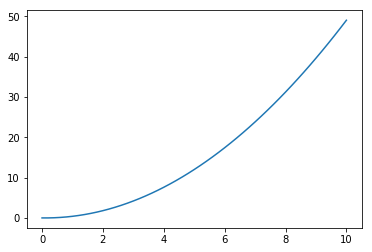

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(time, x,label="ma courbe")

**b)** Compléter le fichier pour tester **edo.MyEuler** avec  **f.idt** pour $\;N = 50.$ Tracer la solution
approchée (fournie par **MyEuler**) avec **la solution exacte**, pour pouvoir comparer les deux fonctions.


**c)** Tester pour d’autres valeurs de $N : 5, 10, 50, 100, 200.$ On pourra aussi tracer l’écart
entre la solution exacte et la solution numérique en $t = t_{0} + T = 10$ en fonction de $N$.

**Indication:** On pourra tracer la solution numérique et la légender à l’aide de la commande:

                           plt. plot (time , x, label = 'sol.␣num.')
                           
L’argument **label** permet de nommer les courbes. Pour afficher la légende, il faut ajouter, juste
avant la commande **plt.show(),** la commande **plt.legend()**. 

Il est important d’avoir tracé toutes
les courbes avant (tous les appels à **plt.plot** doivent avoir été faits avant).
                           


In [13]:
%%writefile solve_EDO.py
import numpy as np

def Stepteun(t, x, h ,f):
    return x + h*f(t,x)

def StepEuler(t, x, h, f):
    """𝑡+ℎ:𝑆𝑡𝑒𝑝𝐸𝑢𝑙𝑒𝑟(𝑡,𝑥,ℎ,𝑓)=𝑥+ℎ𝑓(𝑡,𝑥)."""
    #oui bien
    return x + h*0.5*(f(t,x) + f(t+1, Stepteun(t,x,h,f))

def MyEuler(t0,x0, T, N, f):
    """Fonction """
    h = T/N
    #print(h)
    time = np.empty(N+1)
    x = np.empty(N+1)
    x[0] = x0
    time[0] = t0
    for n in np.arange(N):
        time[n+1] = t0 + (n+1)*h
        x[n+1] = StepEuler(time[n],x[n],h,f)
    return time , x

Overwriting solve_EDO.py


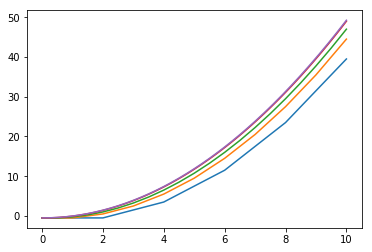

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
time , x = edo.MyEuler(t0 ,x0 ,T,5,f.idt)   
ax.plot(time, x,label=" N = 5")
time , x = edo.MyEuler(t0 ,x0 ,T,10,f.idt)  
ax.plot(time, x,label=" N = 10")
time , x = edo.MyEuler(t0 ,x0 ,T,20,f.idt)  
ax.plot(time, x,label=" N = 50")
time , x = edo.MyEuler(t0 ,x0 ,T,100,f.idt)  
ax.plot(time, x,label=" N = 100")
time , x = edo.MyEuler(t0 ,x0 ,T,200,f.idt)  
ax.plot(time, x,label=" N = 200")

## 2 D’autres fonctions plus difficiles

### Exercice 5.3 : Quelques fonctions

Les fonctions suivantes sont à ajouter au fichier **mes_fonctions.py** :
1. Ecrire une fonction python **idx** qui prend en argument deux réels $t, x$ et renvoie $x$.
2. Ecrire une fonction python **myExp** qui prend en argument un réel $t$ et renvoie $e^{t}$.
3. Ecrire une fonction python **myF** qui prend en argument deux réels $t, x$ et renvoie $x + cos(t)$.
4. Tester ces fonctions.


### Exercice 5.4 : Approximation de $\;e$


On considère l’équation $\; x^{\prime}(t) = x(t)\;$ avec la condition $x(0) = 1$

**1.** En réutilisant la fonction python MyEuler et en s’inspirant du script précédent, écrire
un script python **exo4.py** qui calcule une approximation de $e = x(1)$ en intégrant cette
équation avec la méthode d’Euler pour un pas $\;h = \frac{1}{N},\; N \in \mathbb{N}^{*}$.

x 2.704813829421526


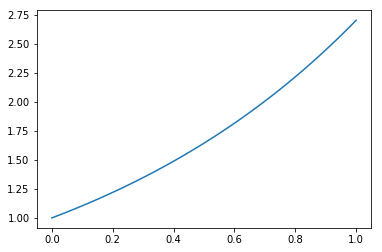

In [15]:
import numpy as np
import matplotlib . pyplot as plt
import mes_fonctions as f
import solve_EDO as edo
# Choix de la plage de valeur en temps
t0 = 0.
x0 = 1.
T = 1.
N = 50 # Choix du nombre de points

time , x = edo.MyEuler(t0 ,x0 ,T,N,f.idx)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
time , x = edo.MyEuler(t0 ,x0 ,T,100,f.idx)   
ax.plot(time, x,label=" N = 100")
print("x " + str(x[100]))

**2.** Tester pour différentes valeurs de $N$ et tracer l’erreur en fonction de $h$.


x 2.715568520651728
reste 2.718281828459045


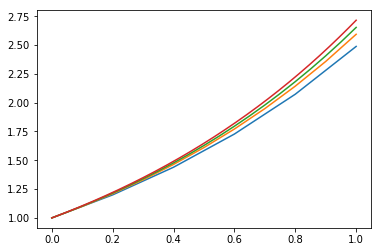

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
time , x = edo.MyEuler(t0 ,x0 ,T,5,f.idx)   
ax.plot(time, x,label=" N = 5")
time , x = edo.MyEuler(t0 ,x0 ,T,10,f.idx)  
ax.plot(time, x,label=" N = 10")
time , x = edo.MyEuler(t0 ,x0 ,T,20,f.idx)  
ax.plot(time, x,label=" N = 50")
time , x = edo.MyEuler(t0 ,x0 ,T,500,f.idx)  
ax.plot(time, x,label=" N = 100")
print("x " + str(x[500]))
print("reste " + str(np.exp(1)))

## Exercice 5.5 : Un cas instable

On considère le problème de Cauchy pour $\;f(t, x) = x + cos(t)\;$ et $\;(t_{0}, x_{0}) = (0, −\frac{1}{2}).$

**1.** Trouver explicitement la solution. (Essayer $\;x(t) = A \; \cos(t) + B \; \sin(t).$)

                                               en gros x'(t) = f(t,x)

$
 \left\{
    \begin{array}{ll}
        x^{\prime}(t)= x + cos(t) \\
        x(t_{0})=A cos() + B sin(t)
    \end{array}
\right.
$
$\quad \quad $

**2.** Construire un script donnant la solution calculée par le schéma d’Euler sur l’intervalle $[0, 10]$
avec un pas $\;h = \frac{10}{N},\; N \in \mathbb{N}^{*}$.

x -0.20495947385784283


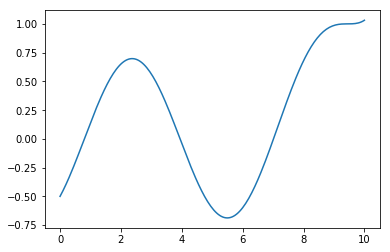

In [26]:
t0 = 0.
x0 = -1/2.
T = 10.
N = 200 # Choix du nombre de points

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
time , x = edo.MyEuler(t0 ,x0 ,T,N,f.myF)
ax.plot(time, x,label=" N = 100")
print("x " + str(x[10]))

**3.** Regardez plusieurs valeurs de $N \;(N = 50, 100, 500, . . .)$ et comparez les différentes approximations
obtenues avec la solution exacte (tracez les approximations obtenues et la solution
exacte).

In [ ]:
# votre code